# Import libs

In [1]:
import sys, os
if not sys.path[0] == os.path.abspath('..'):
    sys.path.insert(0, os.path.abspath('..'))

import pandas as pd
import numpy as np
from knn.knn import knn
from dmc.dmc import dmc
from bayes_classifier.bayes_classifier import bayes_classifier
from sklearn.model_selection import train_test_split
# from sklearn.metrics import confusion_matrix
from utils.functions import confusion_matrix, confusion_matrix_mean
from matplotlib import pyplot as plt

# Loading Breast Cancer dataset

In [2]:
Xy = pd.read_csv('./datasets/breast_cancer.csv')
Xy.dropna(inplace=True)
X = Xy.drop(['diagnosis', 'id'], axis=1)
y = Xy['diagnosis']

# Running the tests and computing informations

In [3]:
realizations = 20
knn_hit_rate_list = []
dmc_hit_rate_list = []
b_hit_rate_list = []
knn_std_dev = 0
dmc_std_dev = 0
b_std_dev = 0
knn_confusion_matrix_list = []
dmc_confusion_matrix_list = []
b_confusion_matrix_list = []

for r in range(realizations):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

    knn_model = knn(k=3, type_distance_calc='euclidean')
    knn_model.fit(X_train, y_train)

    dmc_model = dmc(type_distance_calc='euclidean')
    dmc_model.fit(X_train, y_train)

    b_model = bayes_classifier()
    b_model.fit(X_train, y_train)

    knn_hit_rate_list.append(knn_model.score(X_test, y_test))
    dmc_hit_rate_list.append(dmc_model.score(X_test, y_test))
    b_hit_rate_list.append(b_model.score(X_test, y_test))

    knn_y_pred = [knn_model.predict(x) for x in X_test.values]
    dmc_y_pred = [dmc_model.predict(x) for x in X_test.values]
    b_y_pred = [b_model.predict(x) for x in X_test.values]

    knn_confusion_matrix_list.append(confusion_matrix(y_test, knn_y_pred))
    dmc_confusion_matrix_list.append(confusion_matrix(y_test, dmc_y_pred))
    b_confusion_matrix_list.append(confusion_matrix(y_test, b_y_pred))

knn_std_dev = np.std(knn_hit_rate_list)
dmc_std_dev = np.std(dmc_hit_rate_list)
b_std_dev = np.std(b_hit_rate_list)

w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a

# Showing knn informations computed

In [4]:
print('----------------- KNN model -----------------')
print('Hit rate:')
print(knn_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(knn_hit_rate_list)/len(knn_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(knn_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in knn_confusion_matrix_list:
    print(matrix, end='\n')

----------------- KNN model -----------------
Hit rate:
[0.9473684210526315, 0.9473684210526315, 0.8947368421052632, 0.9298245614035088, 0.9210526315789473, 0.9385964912280702, 0.9122807017543859, 0.9385964912280702, 0.956140350877193, 0.9473684210526315, 0.9210526315789473, 0.9649122807017544, 0.956140350877193, 0.9385964912280702, 0.9035087719298246, 0.9385964912280702, 0.9035087719298246, 0.956140350877193, 0.9298245614035088, 0.9122807017543859]

Accuracy:
0.9328947368421054

Standard Deviation:
0.01966849765331461

Confusion Matrix:
    B   M
B  64   2
M   4  44
    B   M
B  74   4
M   2  34
    M   B
M  44   9
B   3  58
    M   B
M  36   6
B   2  70
    B   M
B  70   3
M   6  35
    M   B
M  39   6
B   1  68
    B   M
B  64   3
M   7  40
    B   M
B  70   3
M   4  37
    M   B
M  30   3
B   2  79
    B   M
B  78   2
M   4  30
    B   M
B  67   4
M   5  38
    M   B
M  45   3
B   1  65
    M   B
M  34   5
B   0  75
    B   M
B  74   2
M   5  33
    M   B
M  37   5
B   6  66
    B 

In [5]:
confusion_matrix_mean(knn_confusion_matrix_list)

,B,M
B,69,2
M,5,36


# Showing dmc informations computed

In [6]:
print('----------------- DMC model -----------------')
print('Hit rate:')
print(dmc_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(dmc_hit_rate_list)/len(dmc_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(dmc_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in dmc_confusion_matrix_list:
    print(matrix, end='\n')

----------------- DMC model -----------------
Hit rate:
[0.8947368421052632, 0.9385964912280702, 0.8771929824561403, 0.8859649122807017, 0.868421052631579, 0.868421052631579, 0.8421052631578947, 0.8947368421052632, 0.9385964912280702, 0.8947368421052632, 0.8859649122807017, 0.9122807017543859, 0.9385964912280702, 0.9210526315789473, 0.8508771929824561, 0.9122807017543859, 0.8947368421052632, 0.9122807017543859, 0.8245614035087719, 0.8771929824561403]

Accuracy:
0.8916666666666666

Standard Deviation:
0.03079871905975573

Confusion Matrix:
    B   M
B  66   0
M  12  36
    B   M
B  77   1
M   6  30
    M   B
M  41  12
B   2  59
    M   B
M  30  12
B   1  71
    B   M
B  71   2
M  13  28
    M   B
M  30  15
B   0  69
    B   M
B  67   0
M  18  29
    B   M
B  71   2
M  10  31
    M   B
M  27   6
B   1  80
    B   M
B  79   1
M  11  23
    B   M
B  70   1
M  12  31
    M   B
M  38  10
B   0  66
    M   B
M  32   7
B   0  75
    B   M
B  76   0
M   9  29
    M   B
M  28  14
B   3  69
    B

In [7]:
confusion_matrix_mean(dmc_confusion_matrix_list)

,B,M
B,71,0
M,11,30


# Showing bayes informations computed

In [8]:
print('----------------- BAYES model -----------------')
print('Hit rate:')
print(b_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(b_hit_rate_list)/len(b_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(b_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in b_confusion_matrix_list:
    print(matrix, end='\n')

----------------- BAYES model -----------------
Hit rate:
[0.9473684210526315, 0.9736842105263158, 0.9122807017543859, 0.9298245614035088, 0.9473684210526315, 0.9385964912280702, 0.9736842105263158, 0.9473684210526315, 0.9473684210526315, 0.9649122807017544, 0.9649122807017544, 0.956140350877193, 0.9649122807017544, 0.9649122807017544, 0.956140350877193, 0.9736842105263158, 0.9210526315789473, 0.9912280701754386, 0.9649122807017544, 0.9473684210526315]

Accuracy:
0.9543859649122808

Standard Deviation:
0.01873171623163389

Confusion Matrix:
    B   M
B  63   3
M   3  45
    B   M
B  75   3
M   0  36
    M   B
M  48   5
B   5  56
    M   B
M  39   3
B   5  67
    B   M
B  69   4
M   2  39
    M   B
M  41   4
B   3  66
    B   M
B  65   2
M   1  46
    B   M
B  68   5
M   1  40
    M   B
M  30   3
B   3  78
    B   M
B  78   2
M   2  32
    B   M
B  68   3
M   1  42
    M   B
M  46   2
B   3  63
    M   B
M  38   1
B   3  72
    B   M
B  74   2
M   2  36
    M   B
M  40   2
B   3  69
   

In [9]:
confusion_matrix_mean(b_confusion_matrix_list)

,B,M
B,69,3
M,2,39


# Choosing two columns from the last X_train and X_test to plot decision surface

In [10]:
X_train_2d, X_test_2d = X_train[['radius_mean', 'texture_mean']], X_test[['radius_mean', 'texture_mean']]

print('Train dataset:')
print(X_train_2d)
print('Test dataset:')
print(X_test_2d)

Train dataset:
     radius_mean  texture_mean
136       11.710         16.67
344       11.710         15.45
449       21.100         20.52
22        15.340         14.26
138       14.950         17.57
..           ...           ...
454       12.620         17.15
101        6.981         13.43
134       18.450         21.91
153       11.150         13.08
213       17.420         25.56

[455 rows x 2 columns]
Test dataset:
     radius_mean  texture_mean
287        12.89         13.12
178        13.01         22.22
258        15.66         23.20
461        27.42         26.27
52         11.94         18.24
..           ...           ...
157        16.84         19.46
320        10.25         16.18
310        11.70         19.11
239        17.46         39.28
128        15.10         16.39

[114 rows x 2 columns]


# Training the models with the new dataset 2d

In [11]:
knn_model = knn(k=3, type_distance_calc='euclidean')
knn_model.fit(X_train_2d, y_train)
dmc_model = dmc(type_distance_calc='euclidean')
dmc_model.fit(X_train_2d, y_train)
b_model = bayes_classifier()
b_model.fit(X_train_2d, y_train)

w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])


# Plotting knn decision surface

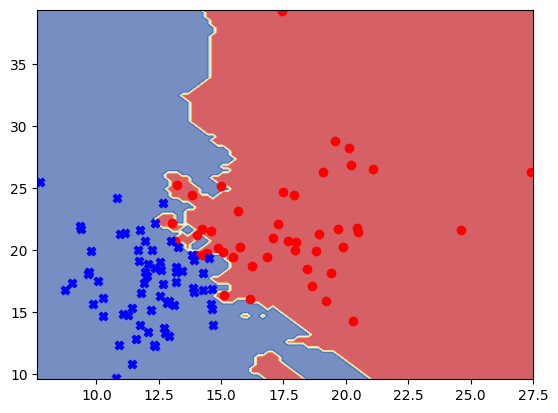

In [12]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[knn_model.predict(x) for x in x_in]]
for i, y in enumerate(y_pred[0]):
    if y == 'M':
        y_pred[0][i] = 1
    else:
        y_pred[0][i] = 2

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

knn_y_pred = np.array([knn_model.predict(x) for x in X_test_2d.values])

M = np.where(knn_y_pred == 'M')
B = np.where(knn_y_pred == 'B')

plt.scatter(data[M, 0], data[M, 1],
            color='red', marker='o', label='M')
plt.scatter(data[B, 0], data[B, 1],
            color='blue', marker='X', label='B')

plt.show()

# Plotting dmc decision surface

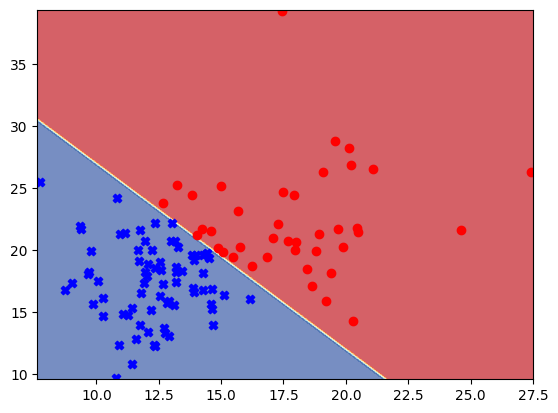

In [13]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[dmc_model.predict(x) for x in x_in]]
for i, y in enumerate(y_pred[0]):
    if y == 'M':
        y_pred[0][i] = 1
    else:
        y_pred[0][i] = 2

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

dmc_y_pred = np.array([dmc_model.predict(x) for x in X_test_2d.values])

M = np.where(dmc_y_pred == 'M')
B = np.where(dmc_y_pred == 'B')

plt.scatter(data[M, 0], data[M, 1],
            color='red', marker='o', label='M')
plt.scatter(data[B, 0], data[B, 1],
            color='blue', marker='X', label='B')

plt.show()

# Plotting bayes decision surface

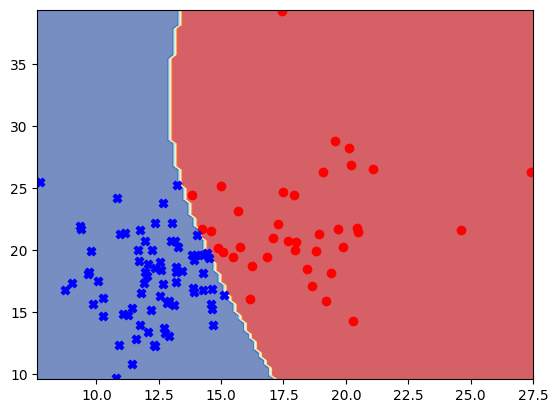

In [14]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[b_model.predict(x) for x in x_in]]
for i, y in enumerate(y_pred[0]):
    if y == 'M':
        y_pred[0][i] = 1
    else:
        y_pred[0][i] = 2

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

b_y_pred = np.array([b_model.predict(x) for x in X_test_2d.values])

M = np.where(b_y_pred == 'M')
B = np.where(b_y_pred == 'B')

plt.scatter(data[M, 0], data[M, 1],
            color='red', marker='o', label='M')
plt.scatter(data[B, 0], data[B, 1],
            color='blue', marker='X', label='B')

plt.show()